<a href="https://colab.research.google.com/github/tanugoyal123/WALMART_SALES_ANALYSIS/blob/main/WALMART_SALES_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## connecting with bigquery

In [ ]:

project_id = 'total-casing-397213' #@param{type:"string"}

# Package used for interfacing w/ BigQuery from Python
from google.cloud import bigquery

# Create BigQuery client
bq_client = bigquery.Client(project = project_id)

# PROBLEM STATEMENT

Analysis Tasks

Basic Statistics tasks
1) Which store has maximum sales

2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

3) Which store/s has good quarterly growth rate in Q3’2012

4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

5) Provide a monthly and semester view of sales in units and give insights

Statistical Model
For Store 1 – Build prediction models to forecast demand (Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.) Change dates into days by creating new variable.
Select the model which gives best accuracy.

## 1. Which store has maximum sales

In [ ]:
#query for retrieving store with maximum sales
%%bigquery sales --project {project_id}

SELECT
  Store ,
  sum(Weekly_Sales) AS Total_revenue_of_each_store
FROM `Sales_data.walmart_sales`
GROUP BY Store
ORDER BY Total_revenue_of_each_store DESC;

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
sales.head()

,Store,Total_revenue_of_each_store
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08


<BarContainer object of 45 artists>

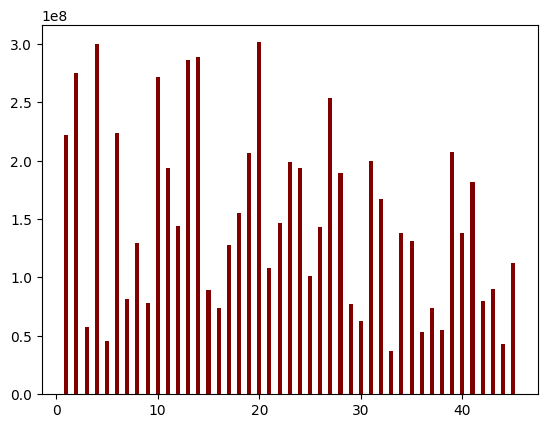

In [ ]:
# ploting a total revenue of each store
import matplotlib.pyplot as plt
plt.bar(sales['Store'],sales['Total_revenue_of_each_store'], color='maroon',width=0.4)

maximum sales is of store number 20

## 2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [ ]:
%%bigquery sd --project {project_id}

SELECT
  Store ,
  STDDEV(Weekly_Sales) AS  Standard_deviation ,
  STDDEV(Weekly_Sales)/AVG(Weekly_Sales)*100 AS coefficient
FROM `Sales_data.walmart_sales`
GROUP BY Store
ORDER BY Standard_deviation DESC;

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
sd.head()

,Store,Standard_deviation,coefficient
0,14,317569.949476,15.713674
1,10,302262.062504,15.913349
2,20,275900.562742,13.090269
3,4,266201.442297,12.708254
4,13,265506.995776,13.251363


store number 14 has the greatest standard_deviation and coefficient of mean standard deviation is shown in table

## 5) Provide a monthly and semester view of sales in units and give insights

In [ ]:
%%bigquery sem --project {project_id}
SELECT
 Months_11 AS MONTH ,
 weekly_sales_10,
 weekly_sales_2011 ,
 weekly_sales_2012
FROM
`Sales_data.2011` AS s2
FULL OUTER JOIN
`Sales_data.2010` AS s1
ON s1.Months_10=s2.Months_11
FULL OUTER JOIN
`Sales_data.2012` AS s3
ON s2.Months_11 = s3.Months
ORDER BY Months_11

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
sem.tail()

,MONTH,weekly_sales_10,weekly_sales_2011,weekly_sales_2012
7,8,1.876401e+08,1.885993e+08,2.368508e+08
8,9,1.772679e+08,2.208477e+08,1.806455e+08
9,10,2.171618e+08,1.832613e+08,1.843617e+08
10,11,2.028534e+08,2.101624e+08,NaN
11,12,2.887605e+08,2.880781e+08,NaN


Monthly view

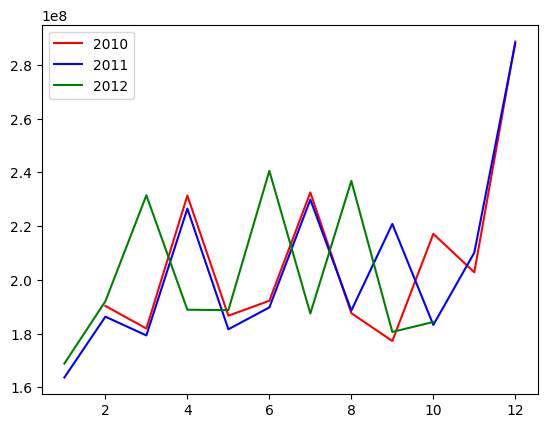

In [ ]:
plt.plot(sem['MONTH'],sem['weekly_sales_10'],color='r',label='2010')
plt.plot(sem['MONTH'],sem['weekly_sales_2011'],color='b',label='2011')
plt.plot(sem['MONTH'],sem['weekly_sales_2012'],color='g',label='2012')
plt.legend()

In [ ]:
%%bigquery MON --project {project_id}
SELECT
   SUM(Weekly_Sales) AS TOTAL,
   CASE
   WHEN (EXTRACT(Month FROM Date) = 1 OR EXTRACT(Month FROM Date) = 2 OR EXTRACT(Month FROM Date) = 3 OR EXTRACT(Month FROM Date) = 4 OR EXTRACT(Month FROM Date) = 5 OR EXTRACT(Month FROM Date) = 6) AND EXTRACT(YEAR FROM Date) = 2010
   THEN 1
   WHEN (EXTRACT(Month FROM Date) = 7 OR EXTRACT(Month FROM Date) = 8 OR EXTRACT(Month FROM Date) =
9 OR EXTRACT(Month FROM Date) = 10 OR EXTRACT(Month FROM Date) = 11 OR EXTRACT(Month FROM Date) = 12) AND EXTRACT(YEAR FROM Date) = 2010
   THEN 2
   WHEN (EXTRACT(Month FROM Date) = 1 OR EXTRACT(Month FROM Date) = 2 OR EXTRACT(Month FROM Date) = 3 OR EXTRACT(Month FROM Date) = 4 OR EXTRACT(Month FROM Date) = 5 OR EXTRACT(Month FROM Date) = 6 )AND EXTRACT(YEAR FROM Date) = 2011
   THEN 3

   WHEN (EXTRACT(Month FROM Date) = 7 OR EXTRACT(Month FROM Date) = 8 OR EXTRACT(Month FROM Date) =
9 OR EXTRACT(Month FROM Date) = 10 OR EXTRACT(Month FROM Date) = 11 OR EXTRACT(Month FROM Date) = 12) AND EXTRACT(YEAR FROM Date) = 2011
   THEN 4
   WHEN (EXTRACT(Month FROM Date) = 1 OR EXTRACT(Month FROM Date) = 2 OR EXTRACT(Month FROM Date) = 3 OR EXTRACT(Month FROM Date) = 4 OR EXTRACT(Month FROM Date) = 5 OR EXTRACT(Month FROM Date) = 6) AND EXTRACT(YEAR FROM Date) = 2012
   THEN 5
   WHEN (EXTRACT(Month FROM Date) = 7 OR EXTRACT(Month FROM Date) = 8 OR EXTRACT(Month FROM Date) =
9 OR EXTRACT(Month FROM Date) = 10 OR EXTRACT(Month FROM Date) = 11 OR EXTRACT(Month FROM Date) = 12) AND EXTRACT(YEAR FROM Date) = 2012
   THEN 6
   END AS SEM
FROM
  `Sales_data.walmart_sales`
GROUP BY SEM
ORDER BY SEM

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
MON

,TOTAL,SEM
0,9.826223e+08,1
1,1.306264e+09,2
2,1.127340e+09,3
3,1.320860e+09,4
4,1.210765e+09,5
5,7.893674e+08,6


Semester view

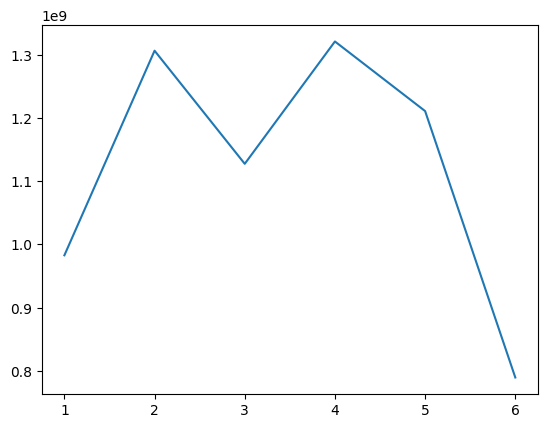

In [ ]:
plt.plot(MON['SEM'],MON['TOTAL'])

## 3) Which store/s has good quarterly growth rate in Q3’2012

In [ ]:
# query for start weekly sales
%%bigquery start --project {project_id}
SELECT
  s.Store,
  s.Weekly_Sales AS START_WEEKLY_SALES
FROM
  Sales_data.walmart_sales as s
INNER JOIN (
  SELECT
    EXTRACT(YEAR FROM Date) AS Year,
    MIN(EXTRACT(Day FROM Date)) AS MinDay
  FROM
    Sales_data.walmart_sales
  WHERE
    EXTRACT(Month FROM Date) = 7
  GROUP BY
    EXTRACT(YEAR FROM Date)
) as  min_days ON EXTRACT(YEAR FROM s.Date) = min_days.Year AND EXTRACT(Day FROM s.Date) = min_days.MinDay
WHERE
  EXTRACT(Month FROM s.Date) = 7 AND EXTRACT(YEAR FROM s.Date) = 2012;

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
start.head()

,Store,START_WEEKLY_SALES
0,13,2184980.35
1,17,1046782.52
2,44,358461.58
3,12,1014898.78
4,28,1500863.54


In [ ]:
# qurey for end weekly sales
%%bigquery end --project {project_id}
SELECT
  s.Store AS store_id,
  s.Weekly_Sales AS END_WEEKLY_SALES
FROM
  Sales_data.walmart_sales as s
INNER JOIN (
  SELECT
    EXTRACT(YEAR FROM Date) AS Year,
    MAX(EXTRACT(Day FROM Date)) AS MaxDay
  FROM
    Sales_data.walmart_sales
  WHERE
    EXTRACT(Month FROM Date) = 9
  GROUP BY
    EXTRACT(YEAR FROM Date)
) as  Max_days ON EXTRACT(YEAR FROM s.Date) = Max_days.Year AND EXTRACT(Day FROM s.Date) = Max_days.MaxDay
WHERE
  EXTRACT(Month FROM s.Date) = 9 AND EXTRACT(YEAR FROM s.Date) = 2012;

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
end.head()

,store_id,END_WEEKLY_SALES
0,7,525545.76
1,16,469607.73
2,32,1157111.15
3,41,1307928.01
4,36,270677.98


In [ ]:
# query for growth rate
%%bigquery GROWTH --project {project_id}
SELECT
Store ,
START_WEEKLY_SALES ,
END_WEEKLY_SALES,
((END_WEEKLY_SALES - START_WEEKLY_SALES)/START_WEEKLY_SALES )*100 AS GROWTH_RATE,
FROM `Sales_data.START` AS S
 INNER JOIN
`Sales_data.END` AS E  ON S.Store = E.store_id
ORDER BY GROWTH_RATE DESC

Query is running:   0%|          |

Downloading:   0%|          |

Quartely growth rate

In [ ]:
GROWTH.head()

,Store,START_WEEKLY_SALES,END_WEEKLY_SALES,GROWTH_RATE
0,37,519498.32,527953.14,1.627497
1,44,358461.58,355307.94,-0.879771
2,30,440553.42,425410.04,-3.437354
3,32,1214183.97,1157111.15,-4.700508
4,3,411206.50,389813.02,-5.202612


plot for growth rate with stores

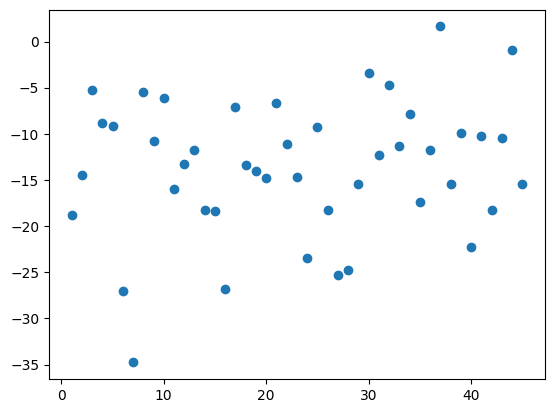

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(GROWTH['Store'],GROWTH['GROWTH_RATE'])

## 4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [ ]:
# query for sales on super_bowl holiday
%%bigquery super_bowl --project {project_id}
SELECT
  AVG(S_W.h) as s
FROM
  (
    SELECT
      Weekly_Sales as h
      FROM `Sales_data.walmart_sales`
      WHERE
      Date = '2012-02-10' OR Date = '2011-02-11' OR Date ='2010-02-12'
  )
  AS S_W

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
super_bowl

,s
0,1.079128e+06


In [ ]:
# query for sales on labour_day holiday
%%bigquery labour_day --project {project_id}
SELECT
  AVG(L_D.M) as L
FROM
  (
    SELECT
      Weekly_Sales as M
      FROM `Sales_data.walmart_sales`
      WHERE
      Date = '2012-09-07' OR Date = '2011-09-11' OR Date ='2010-09-10'
  )
  AS L_D

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
labour_day

,L
0,1.044050e+06


In [ ]:
# query for sales on thanksgiving holiday
%%bigquery thanksgiving --project {project_id}
SELECT
  AVG(T_G.N) as T
FROM
  (
    SELECT
      Weekly_Sales as N
      FROM `Sales_data.walmart_sales`
      WHERE
      Date = '2012-11-23' OR Date = '2011-11-25' OR Date ='2010-11-26'
  )
  AS T_G

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
thanksgiving

,T
0,1.471273e+06


In [ ]:
# query for sales on christmas holiday
%%bigquery christmas --project {project_id}
SELECT
  AVG(c_f.j) as c
FROM
  (
    SELECT
      Weekly_Sales as j
      FROM `Sales_data.walmart_sales`
      WHERE
      Date = '2012-11-28' OR Date = '2011-11-30' OR Date ='2010-12-31'
  )
  AS c_f

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
christmas

,c
0,898500.422222


In [ ]:
# query for sales on  no holiday
%%bigquery no_holiday --project {project_id}
SELECT
  AVG(Weekly_Sales) as u
FROM `Sales_data.walmart_sales`
WHERE
   Holiday_Flag = 0

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
no_holiday

,u
0,1.041256e+06


In [ ]:
y=[super_bowl.iloc[0,0],labour_day.iloc[0,0],thanksgiving.iloc[0,0],christmas.iloc[0,0],no_holiday.iloc[0,0]]

In [ ]:
y

[1079127.9877037038,
 1044049.5238888883,
 1471273.4277777774,
 898500.4222222223,
 1041256.3802088543]

In [ ]:
x=['Super_Bowl','Labou_Day','Thanks_Giving','Christmas','No_Holiday']

<BarContainer object of 5 artists>

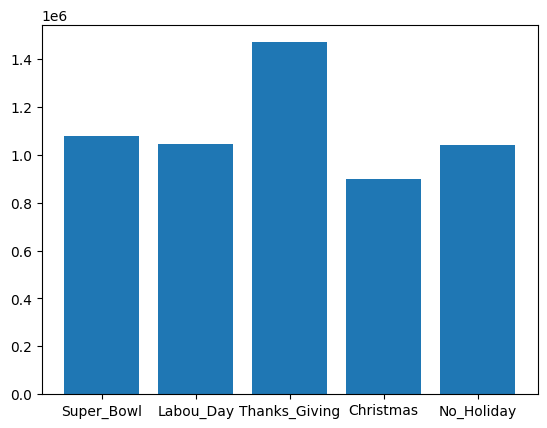

In [ ]:
plt.bar(x,y)

thanksgiving holiday have more sales than the mean sales for non holiday day

## Statistical Model For Store 1 – Build prediction models to forecast demand (Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.) Change dates into days by creating new variable. Select the model which gives best accuracy.

In [ ]:
# query to extract data of store 1
%%bigquery  data--project {project_id}
SELECT *
FROM `Sales_data.walmart_sales`
WHERE Store =1
ORDER BY Date

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
#creating a new feature num_of_day
store1 = data[data['Store'] == 1].sort_values(by = 'Date', ascending = True)

def date_to_days(df):
    days = []
    for i in df:
        convert = (i - df[0]).days
        days.append(convert)
    days[0] = 1
    return days
data['num_of_day']= date_to_days(data['Date'])
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,num_of_day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,7
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,14
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,21
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,28
...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,966
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,973
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,980
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,987


In [ ]:
data.dtypes

Store             Int64
Date             dbdate
Weekly_Sales    float64
Holiday_Flag      Int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
num_of_day        int64
dtype: object

Text(0, 0.5, 'num_of_day')

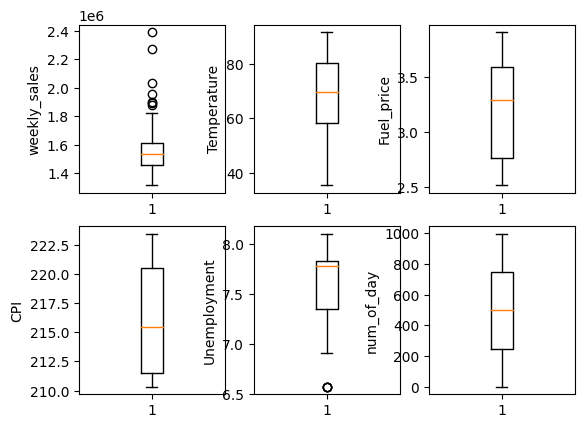

In [ ]:
# visulaizing the data using box plot to see outliers
df=data[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','num_of_day']]
plt.subplot(2,3,1)
plt.boxplot(df['Weekly_Sales'])
plt.ylabel('weekly_sales')
plt.subplot(2,3,2)
plt.boxplot(df['Temperature'])
plt.ylabel('Temperature')
plt.subplot(2,3,3)
plt.boxplot(df['Fuel_Price'])
plt.ylabel('Fuel_price')
plt.subplot(2,3,4)
plt.boxplot(df['CPI'])
plt.ylabel('CPI')
plt.subplot(2,3,5)
plt.boxplot(df['Unemployment'])
plt.ylabel('Unemployment')
plt.subplot(2,3,6)
plt.boxplot(df['num_of_day'])
plt.ylabel('num_of_day')

visulization to see correlation

<Axes: >

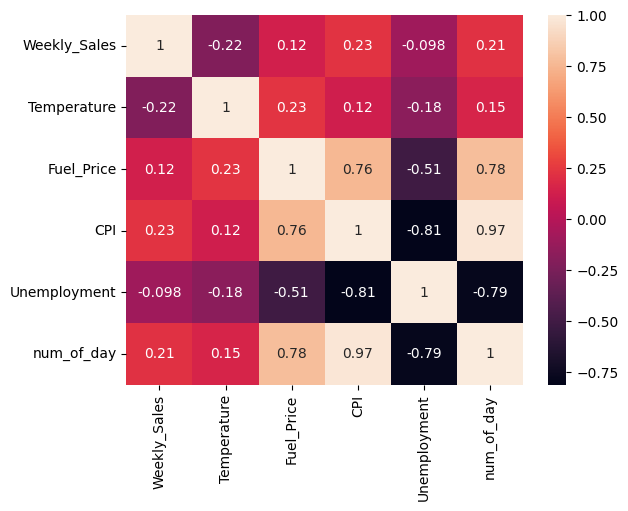

In [ ]:
import seaborn as sn

sn.heatmap(df.corr(),annot=True)

In [ ]:
#dividing the data in feature and target
x=data[['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','num_of_day']]
XN= x.astype(float)
y=data['Weekly_Sales']



In [ ]:
# calculating vif for multicollinearity
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = XN.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(XN.values, i)
                          for i in range(len(XN.columns))]
vif_data

,feature,VIF
0,Holiday_Flag,1.151845
1,Temperature,26.500701
2,Fuel_Price,171.901478
3,CPI,1206.014512
4,Unemployment,1061.975843
5,num_of_day,30.356970


VIF more than 10 is problem for us so we will use centering technique to reduce VIF

In [ ]:
import numpy as np
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment','num_of_day']
x_c=data[['Temperature','Fuel_Price','CPI','Unemployment','num_of_day']]
XN= x_c.astype(float)
for col in cols:
    XN[col] = XN[col] - np.mean(XN[col])


In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = XN.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(XN.values, i)
                          for i in range(len(XN.columns))]
vif_data

,feature,VIF
0,Temperature,1.124940
1,Fuel_Price,2.933086
2,CPI,22.397496
3,Unemployment,3.341366
4,num_of_day,21.885934


now also VIF for CPI and unemployment are high so we will drop them

In [ ]:
x1 = x.drop(columns=["num_of_day",'CPI'])
cols = ['Temperature', 'Fuel_Price','Unemployment']
XN1 = x1.astype(float)
for col in cols:
    XN1[col] = XN1[col] - np.mean(XN1[col])

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = XN1.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(XN1.values, i)
                          for i in range(len(XN1.columns))]
vif_data

,feature,VIF
0,Holiday_Flag,1.041547
1,Temperature,1.095574
2,Fuel_Price,1.395560
3,Unemployment,1.368087


now VIF are fine

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
XN1 = sm.add_constant(XN1)
model = sm.OLS(y, XN1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     4.359
Date:                Fri, 15 Sep 2023   Prob (F-statistic):            0.00238
Time:                        18:18:00   Log-Likelihood:                -1903.8
No. Observations:                 143   AIC:                             3818.
Df Residuals:                     138   BIC:                             3832.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.548e+06   1.29e+04    119.571   

the model shows that fuel_price and unemployment are not impacting sales, and CPI is dropped due to multicollinearity